## Sumbit

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
TRAIN_PATH = "/Users/annastarostina/Downloads/мл/lab2/train.csv"
TEST_PATH = "/Users/annastarostina/Downloads/мл/lab2/test.csv"

In [4]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

### Инициализация

In [5]:
train_df.head()

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8000 non-null   int64  
 1   category               8000 non-null   object 
 2   clicks                 7727 non-null   float64
 3   likes                  7624 non-null   float64
 4   buys                   8000 non-null   int64  
 5   4xx_errors             8000 non-null   int64  
 6   5xx_errors             8000 non-null   int64  
 7   complaints_count       7527 non-null   object 
 8   average_dwelltime      8000 non-null   float64
 9   source_attractiveness  8000 non-null   float64
 10  date_of_registration   8000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 687.6+ KB


In [7]:
train_df = train_df.drop("Unnamed: 0", axis=1)

Удаляем NaN значения и в тестовом датасете заменяем их на средние значения

### Очистка

Обучающий датсет

In [8]:
train_df["complaints_count"] = train_df["complaints_count"].replace("-", np.nan)
train_df["complaints_count"] = pd.to_numeric(train_df["complaints_count"])

train_df["average_dwelltime"] = train_df["average_dwelltime"].replace(-1, np.nan)

train_df = train_df.dropna()

In [9]:
train_df = pd.get_dummies(train_df, columns=['category'], drop_first=True)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6229 entries, 1 to 7998
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clicks                       6229 non-null   float64
 1   likes                        6229 non-null   float64
 2   buys                         6229 non-null   int64  
 3   4xx_errors                   6229 non-null   int64  
 4   5xx_errors                   6229 non-null   int64  
 5   complaints_count             6229 non-null   float64
 6   average_dwelltime            6229 non-null   float64
 7   source_attractiveness        6229 non-null   float64
 8   date_of_registration         6229 non-null   object 
 9   category_information_source  6229 non-null   bool   
 10  category_news                6229 non-null   bool   
 11  category_porn                6229 non-null   bool   
 12  category_social              6229 non-null   bool   
dtypes: bool(4), float64(5),

Тестовый датасет

In [11]:
test_df["complaints_count"] = test_df["complaints_count"].replace("-", np.nan)
test_df["complaints_count"] = pd.to_numeric(test_df["complaints_count"])


test_df["average_dwelltime"] = test_df["average_dwelltime"].replace(-1, np.nan)

numeric_columns = ["clicks", "likes", "buys", "4xx_errors", "5xx_errors", "complaints_count", "average_dwelltime"]
test_df[numeric_columns] = test_df[numeric_columns].fillna(test_df[numeric_columns].median())

In [12]:
test_df = pd.get_dummies(test_df, columns=['category'], drop_first=True)

Преобразуем дату регистрации

In [13]:
train_df["date_of_registration"] = pd.to_datetime(train_df["date_of_registration"])
train_df["age"] = (pd.Timestamp('now') - train_df["date_of_registration"]) / pd.Timedelta(days=365)
train_df = train_df.drop("date_of_registration", axis=1)

test_df["date_of_registration"] = pd.to_datetime(test_df["date_of_registration"])
test_df["age"] = (pd.Timestamp('now') - test_df["date_of_registration"]) / pd.Timedelta(days=365)
test_df = test_df.drop("date_of_registration", axis=1)

### Анализ

Корреляционная матрица

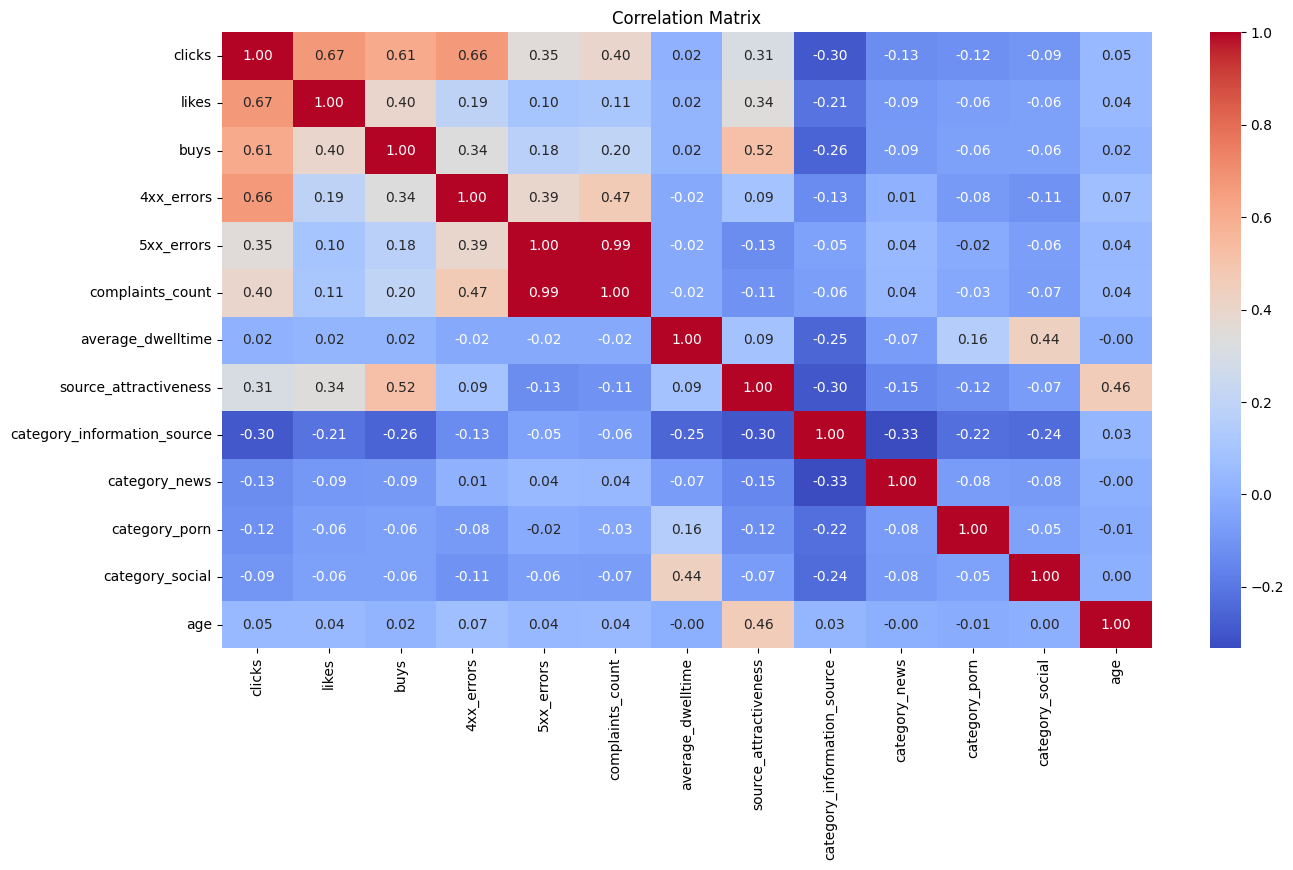

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Удаляем признак с высокой корреляцией

In [15]:
train_df = train_df.drop("complaints_count", axis=1)

test_df = test_df.drop("complaints_count", axis=1)

### Обучение

In [16]:
X = train_df.drop("source_attractiveness", axis=1)
y = train_df["source_attractiveness"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True,
)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(mse)

0.014868415598565577


## Final model submit function

Принимает на вход путь к набору данных в формате `.csv`

На выходе получается файл с предиктами в формате `.csv`

Пример содержания:
```
0.432
0.412
0.312
```

Реализация модели - между ними

In [17]:
X = test_df.drop(columns=['ID'], axis=1)


predicts = model.predict(X)

data = {
    " source_attractiveness": predicts
}
submit = pd.DataFrame(data)
submit.to_csv('submission.csv', index_label="ID")